# Projeto - Estudando A Guerra da Ucrânia com Informação Georreferenciada

**Disciplina:** Informação Georreferênciada

**Autores:** Bernardo Cunha Capoferri, Francisco Pinheiro Janela

- EPSG: 6381

### Importando Bibliotecas

In [67]:
import os
os.environ['USE_PYGEOS'] = '0'

import pandas as pd
pd.set_option('display.max_columns', None)

import geopandas as gpd

import matplotlib.pyplot as plt

## Importando Dados

In [68]:
df_pull_stations = pd.read_csv('../data/pull_stations.csv')
df_pull_stations = df_pull_stations.iloc[228:-1].reset_index(drop=True)
df_pull_stations.head()

,id,parent_id,level,name,region,tikId,city,lat,lon
0,228,27,3,ВД № 050130,Вінницька область,11,NaN,49.306361,28.468460
1,229,27,3,ВД № 050131,Вінницька область,11,NaN,49.308055,28.471841
2,230,27,3,ВД № 050132,Вінницька область,11,NaN,49.310606,28.472663
3,231,27,3,ВД № 050133,Вінницька область,11,NaN,49.304283,28.482872
4,232,27,3,ВД № 050134,Вінницька область,11,NaN,49.331720,28.533021


In [69]:
df_voting_results = pd.read_csv('../data/results_2019_12_47b.csv', sep=';')
df_voting_results.head()

/tmp/ipykernel_5406/2159070499.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_voting_results = pd.read_csv('../data/results_2019_12_47b.csv', sep=';')


,tikId,name,voters,totalVotes,Балашов Геннадій,Безсмертний Роман,Богомолець Ольга,Богословська Інна,Бойко Юрій,Бондар Віктор,Ващенко Олександр,Вілкул Олександр,Габер Микола,Гриценко Анатолій,Данилюк Олександр,Дерев’янко Юрій,Журавльов Василь,Зеленський Володимир,Каплін Сергій,Кармазін Юрій,Кива Ілля,Корнацький Аркадій,Кошулинський Руслан,Кривенко Віктор,Купрій Віталій,Литвиненко Юлія,Ляшко Олег,Мороз Олександр,Наливайченко Валентин,Насіров Роман,Новак Андрій,Носенко Сергій,Петров Володимир,Порошенко Петро,Ригованов Руслан,Скоцик Віталій,Смешко Ігор,Соловйов Олександр,Тарута Сергій,Тимошенко Юлія,Тимошенко Юрій,Шевченко Ігор,Шевченко Олександр
0,11,ВД № 050130,1686,1121,3,2,2,0,32,0,0,11,0,73,0,2,1,232,0,0,0,0,17,0,0,1,45,1,2,0,0,1,0,370,1,1,120,0,0,169,11,1,3
1,11,ВД № 050131,2109,1358,1,2,1,2,47,1,1,33,0,97,0,0,0,319,1,1,1,1,23,0,1,1,46,0,4,0,0,0,1,365,0,2,147,0,2,213,19,0,9
2,11,ВД № 050132,1282,841,1,0,2,1,41,0,0,10,0,48,0,1,1,204,0,0,3,0,12,0,0,1,35,0,1,0,0,0,2,247,0,0,95,2,0,104,9,1,1
3,11,ВД № 050133,2434,1594,2,0,4,2,55,1,1,29,0,94,1,1,0,320,0,0,1,0,31,2,0,2,61,1,7,0,1,0,0,524,0,3,186,0,0,231,10,1,12
4,11,ВД № 050134,225,140,1,0,1,0,1,0,0,1,0,12,0,0,0,36,0,0,0,0,3,0,0,0,3,1,1,0,0,0,0,39,0,0,14,0,0,26,0,1,0


In [70]:
df_pull_stations.columns

Index(['id', 'parent_id', 'level', 'name', 'region', 'tikId', 'city', 'lat',
       'lon'],
      dtype='object')

In [71]:
df_voting_results.columns

Index(['tikId', 'name', 'voters', 'totalVotes', 'Балашов Геннадій',
       'Безсмертний Роман', 'Богомолець Ольга', 'Богословська Інна',
       'Бойко Юрій', 'Бондар Віктор', 'Ващенко Олександр', 'Вілкул Олександр',
       'Габер Микола', 'Гриценко Анатолій', 'Данилюк Олександр',
       'Дерев’янко Юрій', 'Журавльов Василь', 'Зеленський Володимир',
       'Каплін Сергій', 'Кармазін Юрій', 'Кива Ілля', 'Корнацький Аркадій',
       'Кошулинський Руслан', 'Кривенко Віктор', 'Купрій Віталій',
       'Литвиненко Юлія', 'Ляшко Олег', 'Мороз Олександр',
       'Наливайченко Валентин', 'Насіров Роман', 'Новак Андрій',
       'Носенко Сергій', 'Петров Володимир', 'Порошенко Петро',
       'Ригованов Руслан', 'Скоцик Віталій', 'Смешко Ігор',
       'Соловйов Олександр', 'Тарута Сергій', 'Тимошенко Юлія',
       'Тимошенко Юрій', 'Шевченко Ігор', 'Шевченко Олександр'],
      dtype='object')

In [72]:
df_results = pd.merge(df_voting_results, df_pull_stations, on=['name'], how='left')
df_results.head()

,tikId_x,name,voters,totalVotes,Балашов Геннадій,Безсмертний Роман,Богомолець Ольга,Богословська Інна,Бойко Юрій,Бондар Віктор,Ващенко Олександр,Вілкул Олександр,Габер Микола,Гриценко Анатолій,Данилюк Олександр,Дерев’янко Юрій,Журавльов Василь,Зеленський Володимир,Каплін Сергій,Кармазін Юрій,Кива Ілля,Корнацький Аркадій,Кошулинський Руслан,Кривенко Віктор,Купрій Віталій,Литвиненко Юлія,Ляшко Олег,Мороз Олександр,Наливайченко Валентин,Насіров Роман,Новак Андрій,Носенко Сергій,Петров Володимир,Порошенко Петро,Ригованов Руслан,Скоцик Віталій,Смешко Ігор,Соловйов Олександр,Тарута Сергій,Тимошенко Юлія,Тимошенко Юрій,Шевченко Ігор,Шевченко Олександр,id,parent_id,level,region,tikId_y,city,lat,lon
0,11,ВД № 050130,1686,1121,3,2,2,0,32,0,0,11,0,73,0,2,1,232,0,0,0,0,17,0,0,1,45,1,2,0,0,1,0,370,1,1,120,0,0,169,11,1,3,228.0,27.0,3.0,Вінницька область,11,NaN,49.306361,28.468460
1,11,ВД № 050131,2109,1358,1,2,1,2,47,1,1,33,0,97,0,0,0,319,1,1,1,1,23,0,1,1,46,0,4,0,0,0,1,365,0,2,147,0,2,213,19,0,9,229.0,27.0,3.0,Вінницька область,11,NaN,49.308055,28.471841
2,11,ВД № 050132,1282,841,1,0,2,1,41,0,0,10,0,48,0,1,1,204,0,0,3,0,12,0,0,1,35,0,1,0,0,0,2,247,0,0,95,2,0,104,9,1,1,230.0,27.0,3.0,Вінницька область,11,NaN,49.310606,28.472663
3,11,ВД № 050133,2434,1594,2,0,4,2,55,1,1,29,0,94,1,1,0,320,0,0,1,0,31,2,0,2,61,1,7,0,1,0,0,524,0,3,186,0,0,231,10,1,12,231.0,27.0,3.0,Вінницька область,11,NaN,49.304283,28.482872
4,11,ВД № 050134,225,140,1,0,1,0,1,0,0,1,0,12,0,0,0,36,0,0,0,0,3,0,0,0,3,1,1,0,0,0,0,39,0,0,14,0,0,26,0,1,0,232.0,27.0,3.0,Вінницька область,11,NaN,49.331720,28.533021


In [73]:
df_results.shape

(34011, 51)

In [74]:
df_voting_results.shape

(29989, 43)

In [75]:
# Count number of missing values for lat
df_results.isna().sum()

tikId_x                      0
name                         0
voters                       0
totalVotes                   0
Балашов Геннадій             0
Безсмертний Роман            0
Богомолець Ольга             0
Богословська Інна            0
Бойко Юрій                   0
Бондар Віктор                0
Ващенко Олександр            0
Вілкул Олександр             0
Габер Микола                 0
Гриценко Анатолій            0
Данилюк Олександр            0
Дерев’янко Юрій              0
Журавльов Василь             0
Зеленський Володимир         0
Каплін Сергій                0
Кармазін Юрій                0
Кива Ілля                    0
Корнацький Аркадій           0
Кошулинський Руслан          0
Кривенко Віктор              0
Купрій Віталій               0
Литвиненко Юлія              0
Ляшко Олег                   0
Мороз Олександр              0
Наливайченко Валентин        0
Насіров Роман                0
Новак Андрій                 0
Носенко Сергій               0
Петров В

In [76]:
# drop all rows that have missing values for lat and lon
df_results = df_results.dropna(subset=['lat', 'lon'])
df_results.isna().sum()

tikId_x                      0
name                         0
voters                       0
totalVotes                   0
Балашов Геннадій             0
Безсмертний Роман            0
Богомолець Ольга             0
Богословська Інна            0
Бойко Юрій                   0
Бондар Віктор                0
Ващенко Олександр            0
Вілкул Олександр             0
Габер Микола                 0
Гриценко Анатолій            0
Данилюк Олександр            0
Дерев’янко Юрій              0
Журавльов Василь             0
Зеленський Володимир         0
Каплін Сергій                0
Кармазін Юрій                0
Кива Ілля                    0
Корнацький Аркадій           0
Кошулинський Руслан          0
Кривенко Віктор              0
Купрій Віталій               0
Литвиненко Юлія              0
Ляшко Олег                   0
Мороз Олександр              0
Наливайченко Валентин        0
Насіров Роман                0
Новак Андрій                 0
Носенко Сергій               0
Петров В

In [77]:
df_results.shape

(32552, 51)

In [78]:
gdf_results = gpd.GeoDataFrame(df_results, 
                       geometry=gpd.points_from_xy(df_results['lon'], df_results['lat']),
                       crs='EPSG:4326') 
gdf_results.head()

,tikId_x,name,voters,totalVotes,Балашов Геннадій,Безсмертний Роман,Богомолець Ольга,Богословська Інна,Бойко Юрій,Бондар Віктор,Ващенко Олександр,Вілкул Олександр,Габер Микола,Гриценко Анатолій,Данилюк Олександр,Дерев’янко Юрій,Журавльов Василь,Зеленський Володимир,Каплін Сергій,Кармазін Юрій,Кива Ілля,Корнацький Аркадій,Кошулинський Руслан,Кривенко Віктор,Купрій Віталій,Литвиненко Юлія,Ляшко Олег,Мороз Олександр,Наливайченко Валентин,Насіров Роман,Новак Андрій,Носенко Сергій,Петров Володимир,Порошенко Петро,Ригованов Руслан,Скоцик Віталій,Смешко Ігор,Соловйов Олександр,Тарута Сергій,Тимошенко Юлія,Тимошенко Юрій,Шевченко Ігор,Шевченко Олександр,id,parent_id,level,region,tikId_y,city,lat,lon,geometry
0,11,ВД № 050130,1686,1121,3,2,2,0,32,0,0,11,0,73,0,2,1,232,0,0,0,0,17,0,0,1,45,1,2,0,0,1,0,370,1,1,120,0,0,169,11,1,3,228.0,27.0,3.0,Вінницька область,11,NaN,49.306361,28.468460,POINT (28.46846 49.30636)
1,11,ВД № 050131,2109,1358,1,2,1,2,47,1,1,33,0,97,0,0,0,319,1,1,1,1,23,0,1,1,46,0,4,0,0,0,1,365,0,2,147,0,2,213,19,0,9,229.0,27.0,3.0,Вінницька область,11,NaN,49.308055,28.471841,POINT (28.47184 49.30805)
2,11,ВД № 050132,1282,841,1,0,2,1,41,0,0,10,0,48,0,1,1,204,0,0,3,0,12,0,0,1,35,0,1,0,0,0,2,247,0,0,95,2,0,104,9,1,1,230.0,27.0,3.0,Вінницька область,11,NaN,49.310606,28.472663,POINT (28.47266 49.31061)
3,11,ВД № 050133,2434,1594,2,0,4,2,55,1,1,29,0,94,1,1,0,320,0,0,1,0,31,2,0,2,61,1,7,0,1,0,0,524,0,3,186,0,0,231,10,1,12,231.0,27.0,3.0,Вінницька область,11,NaN,49.304283,28.482872,POINT (28.48287 49.30428)
4,11,ВД № 050134,225,140,1,0,1,0,1,0,0,1,0,12,0,0,0,36,0,0,0,0,3,0,0,0,3,1,1,0,0,0,0,39,0,0,14,0,0,26,0,1,0,232.0,27.0,3.0,Вінницька область,11,NaN,49.331720,28.533021,POINT (28.53302 49.33172)


In [79]:
gdf_ukraine_adm_0 = gpd.read_file('../data/Ukraine_ShapeFiles/ukr_admbnda_adm0_sspe_20230201.shp')
gdf_ukraine_adm_0.head()

,ADM0_EN,ADM0_UA,ADM0_RU,ADM0_PCODE,date,validOn,validTo,geometry
0,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,None,"MULTIPOLYGON (((30.20662 45.25740, 30.20674 45..."


In [80]:
# CRS on gdf_ukraine_adm_0
gdf_ukraine_adm_0.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [81]:
gdf_results = gdf_results.to_crs(epsg=6381)
gdf_ukraine_adm_0 = gdf_ukraine_adm_0.to_crs(epsg=6381)

In [82]:
gdf_results_uk_pull_stations = gpd.sjoin(gdf_results, gdf_ukraine_adm_0, how='inner', op='within')

/home/bernardo/Documents/Insper8thSem/georeferenced-information-class/project/Proj-GEO/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Axes: >

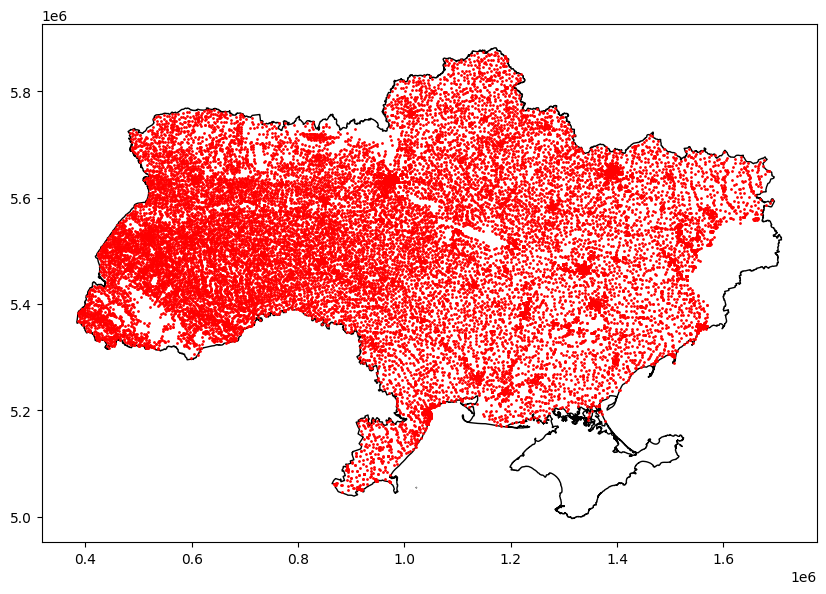

In [83]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ukraine_adm_0.plot(ax=ax, color='white', edgecolor='black')
gdf_results_uk_pull_stations.plot(ax=ax, color='red', markersize=1)

In [84]:
gdf_ukraine_adm_2 = gpd.read_file('../data/Ukraine_ShapeFiles/ukr_admbnda_adm2_sspe_20230201.shp')
gdf_ukraine_adm_2.head()

,ADM2_EN,ADM2_UA,ADM2_RU,ADM2_PCODE,ADM2_REF,ADM1_EN,ADM1_UA,ADM1_RU,ADM1_PCODE,ADM0_EN,ADM0_UA,ADM0_RU,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,Bakhchysaraiskyi,Бахчисарайський,Бахчисарайский,UA0102,None,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,None,3.835411,0.270255,"POLYGON ((33.64833 44.90969, 33.64858 44.90894..."
1,Bilohirskyi,Білогірський,Белогорский,UA0104,None,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,None,5.565672,0.335566,"MULTIPOLYGON (((35.06130 45.57474, 35.06100 45..."
2,Dzhankoiskyi,Джанкойський,Джанкойский,UA0106,None,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,None,8.921192,0.251445,"MULTIPOLYGON (((34.69742 45.71048, 34.69734 45..."
3,Yevpatoriiskyi,Євпаторійський,Евпаторийский,UA0108,None,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,None,4.813707,0.444439,"POLYGON ((33.09983 45.71323, 33.10027 45.71321..."
4,Kerchynskyi,Керченський,Керченский,UA0110,None,Autonomous Republic of Crimea,Автономна Республіка Крим,Автономная Республика Крым,UA01,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,None,5.979506,0.346806,"MULTIPOLYGON (((35.45832 45.27045, 35.45806 45..."


In [85]:
gdf_ukraine_adm_2 = gdf_ukraine_adm_2.to_crs(epsg=6381)

<Axes: >

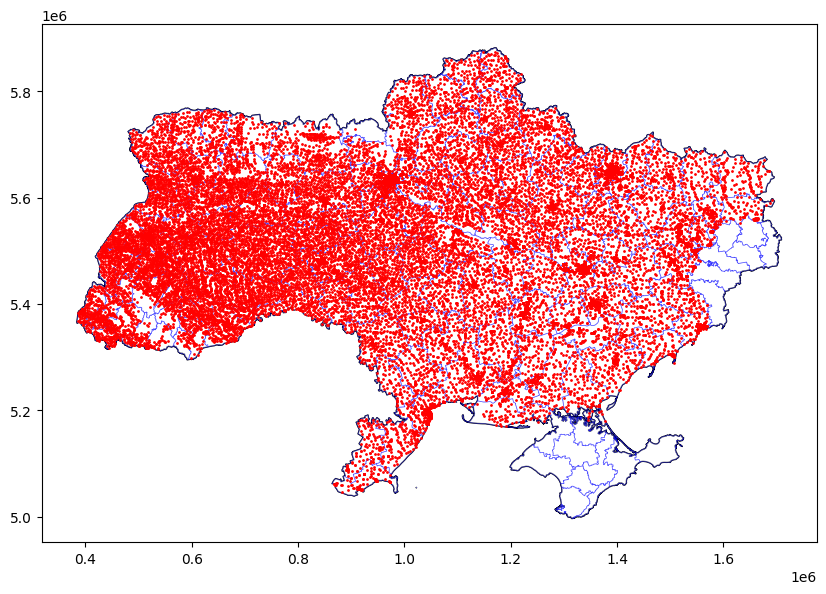

In [86]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ukraine_adm_0.plot(ax=ax, color='white', edgecolor='black')
gdf_ukraine_adm_2.plot(ax=ax, color='white', edgecolor='blue', linewidth=0.5, alpha=0.5)
gdf_results_uk_pull_stations.plot(ax=ax, color='red', markersize=1)

In [87]:
gdf_firms_all_war = gpd.read_file('../data/FIRMS_2402_1123/fire_nrt_J1V-C2_397288.shp')
gdf_firms_all_war.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,geometry
0,47.86332,33.43287,314.90,0.69,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,269.87,5.53,N,POINT (33.43287 47.86332)
1,47.86949,33.43061,335.02,0.69,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,270.24,5.46,N,POINT (33.43061 47.86949)
2,47.87542,33.39306,298.27,0.68,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,271.78,1.67,N,POINT (33.39306 47.87542)
3,47.87539,33.44268,312.47,0.69,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,269.82,3.01,N,POINT (33.44268 47.87539)
4,47.86940,33.38816,302.86,0.68,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,272.16,1.67,N,POINT (33.38816 47.86940)


In [88]:
gdf_firms_all_war = gdf_firms_all_war.to_crs(epsg=6381)

In [89]:
# Filter gdf_firms_all_war to acq_date between 2023-10-01 and 2023-10-31
gdf_firms_out_2023 = gdf_firms_all_war[(gdf_firms_all_war['ACQ_DATE'] >= '2023-10-01') & (gdf_firms_all_war['ACQ_DATE'] <= '2023-10-31')]


<Axes: >

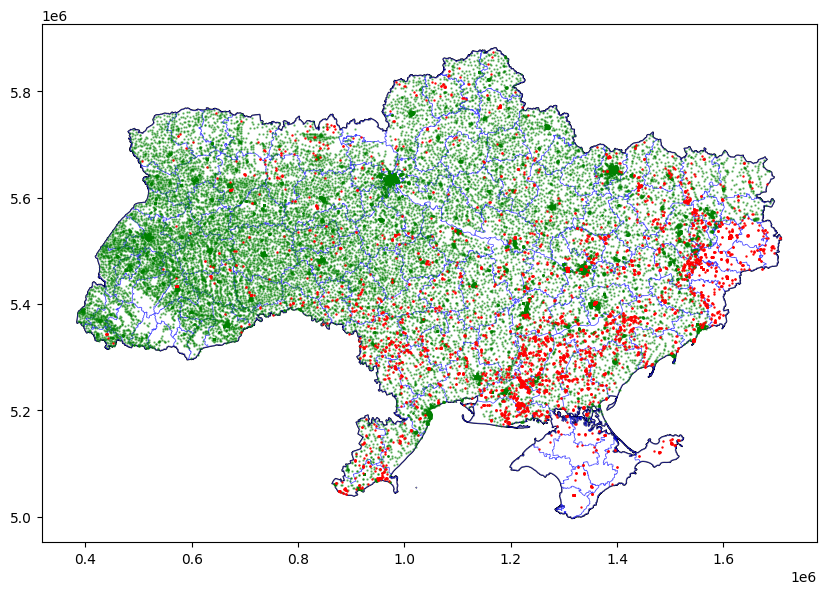

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ukraine_adm_0.plot(ax=ax, color='white', edgecolor='black')
gdf_ukraine_adm_2.plot(ax=ax, color='white', edgecolor='blue', linewidth=0.5, alpha=0.5)
gdf_results_uk_pull_stations.plot(ax=ax, color='green', markersize=0.5, alpha=0.5)
gdf_firms_out_2023.plot(ax=ax, color='red', markersize=0.5)

In [91]:
df_main_ukrain_candidates = pd.read_excel('../data/MainUkranianCandidates.xlsx')
df_main_ukrain_candidates.head()

,Candidates,Ukranian Names,Affiliation
0,Volodymyr Zelenskyy,Зеленський Володимир,Pro-Europe
1,Petro Poroshenko,Порошенко Петро,Pro-Europe
2,Yuriy Boyko,Бойко Юрій,Pro-Russia
3,Oleksandr Vilkul,Вілкул Олександр,Pro-Russia


In [92]:
print(gdf_results.columns)
for i in df_main_ukrain_candidates['Ukranian Names']:
    if i in gdf_results.columns:
        print(i)

Index(['tikId_x', 'name', 'voters', 'totalVotes', 'Балашов Геннадій',
       'Безсмертний Роман', 'Богомолець Ольга', 'Богословська Інна',
       'Бойко Юрій', 'Бондар Віктор', 'Ващенко Олександр', 'Вілкул Олександр',
       'Габер Микола', 'Гриценко Анатолій', 'Данилюк Олександр',
       'Дерев’янко Юрій', 'Журавльов Василь', 'Зеленський Володимир',
       'Каплін Сергій', 'Кармазін Юрій', 'Кива Ілля', 'Корнацький Аркадій',
       'Кошулинський Руслан', 'Кривенко Віктор', 'Купрій Віталій',
       'Литвиненко Юлія', 'Ляшко Олег', 'Мороз Олександр',
       'Наливайченко Валентин', 'Насіров Роман', 'Новак Андрій',
       'Носенко Сергій', 'Петров Володимир', 'Порошенко Петро',
       'Ригованов Руслан', 'Скоцик Віталій', 'Смешко Ігор',
       'Соловйов Олександр', 'Тарута Сергій', 'Тимошенко Юлія',
       'Тимошенко Юрій', 'Шевченко Ігор', 'Шевченко Олександр', 'id',
       'parent_id', 'level', 'region', 'tikId_y', 'city', 'lat', 'lon',
       'geometry'],
      dtype='object')
Зеленськ

In [93]:
print(list(df_main_ukrain_candidates['Ukranian Names']))

['Зеленський Володимир', 'Порошенко Петро', 'Бойко Юрій', 'Вілкул Олександр']


In [94]:
gdf_results_filtered_columns = ['tikId_x', 'name', 'voters', 'totalVotes', 'Зеленський Володимир', 'Порошенко Петро', 'Бойко Юрій', 'Вілкул Олександр', 'id',
       'parent_id', 'level', 'region', 'tikId_y', 'city', 'lat', 'lon',
       'geometry']

gdf_results_filtered = gdf_results[gdf_results_filtered_columns]
gdf_results_filtered.head()

,tikId_x,name,voters,totalVotes,Зеленський Володимир,Порошенко Петро,Бойко Юрій,Вілкул Олександр,id,parent_id,level,region,tikId_y,city,lat,lon,geometry
0,11,ВД № 050130,1686,1121,232,370,32,11,228.0,27.0,3.0,Вінницька область,11,NaN,49.306361,28.468460,POINT (843013.206 5490724.327)
1,11,ВД № 050131,2109,1358,319,365,47,33,229.0,27.0,3.0,Вінницька область,11,NaN,49.308055,28.471841,POINT (843240.017 5490936.859)
2,11,ВД № 050132,1282,841,204,247,41,10,230.0,27.0,3.0,Вінницька область,11,NaN,49.310606,28.472663,POINT (843271.600 5491226.131)
3,11,ВД № 050133,2434,1594,320,524,55,29,231.0,27.0,3.0,Вінницька область,11,NaN,49.304283,28.482872,POINT (844082.924 5490597.619)
4,11,ВД № 050134,225,140,36,39,1,1,232.0,27.0,3.0,Вінницька область,11,NaN,49.331720,28.533021,POINT (847419.605 5494008.966)


In [95]:
# add column with other candidates votes count
gdf_results_filtered['other_candidates'] = gdf_results_filtered['totalVotes'] - gdf_results_filtered['Зеленський Володимир'] - gdf_results_filtered['Порошенко Петро'] - gdf_results_filtered['Бойко Юрій'] - gdf_results_filtered['Вілкул Олександр']

/home/bernardo/Documents/Insper8thSem/georeferenced-information-class/project/Proj-GEO/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [96]:
gdf_results_filtered.head()

,tikId_x,name,voters,totalVotes,Зеленський Володимир,Порошенко Петро,Бойко Юрій,Вілкул Олександр,id,parent_id,level,region,tikId_y,city,lat,lon,geometry,other_candidates
0,11,ВД № 050130,1686,1121,232,370,32,11,228.0,27.0,3.0,Вінницька область,11,NaN,49.306361,28.468460,POINT (843013.206 5490724.327),476
1,11,ВД № 050131,2109,1358,319,365,47,33,229.0,27.0,3.0,Вінницька область,11,NaN,49.308055,28.471841,POINT (843240.017 5490936.859),594
2,11,ВД № 050132,1282,841,204,247,41,10,230.0,27.0,3.0,Вінницька область,11,NaN,49.310606,28.472663,POINT (843271.600 5491226.131),339
3,11,ВД № 050133,2434,1594,320,524,55,29,231.0,27.0,3.0,Вінницька область,11,NaN,49.304283,28.482872,POINT (844082.924 5490597.619),666
4,11,ВД № 050134,225,140,36,39,1,1,232.0,27.0,3.0,Вінницька область,11,NaN,49.331720,28.533021,POINT (847419.605 5494008.966),63


In [97]:
# import data from data/language.csv from "" "" "" csv format
gdf_ukraine_adm_2.shape

(139, 19)

In [111]:
gdf_results_filtered.shape

(32552, 18)

# Coletando Dados de linguagem 

In [99]:
#get shapefiles from Ukraine_oldShapeFiles
gdf_ukraine_adm_2_old = gpd.read_file('../data/Ukraine_oldShapeFiles/UKR_adm2.shp')
#change encoding to utf-8
gdf_ukraine_adm_2_old = gdf_ukraine_adm_2_old
gdf_ukraine_adm_2_old.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,240,UKR,Ukraine,1,Cherkasy,1,Cherkas'ka,UA.CK.CM,0,None,Mis'ka Rada,Mis'ka Rada,None,None,"POLYGON ((32.03880 49.49877, 32.05218 49.49868..."
1,240,UKR,Ukraine,1,Cherkasy,2,Cherkas'kyi,UA.CK.CR,0,None,Raion,District,None,None,"POLYGON ((32.19797 49.20946, 32.18890 49.20953..."
2,240,UKR,Ukraine,1,Cherkasy,3,Chornobaivs'kyi,UA.CK.CB,0,None,Raion,District,None,Chornobayivskyi,"POLYGON ((32.47975 49.30701, 32.47074 49.31886..."
3,240,UKR,Ukraine,1,Cherkasy,4,Chyhyryns'kyi,UA.CK.CY,0,None,Raion,District,None,None,"POLYGON ((32.87844 49.22034, 32.87827 49.20856..."
4,240,UKR,Ukraine,1,Cherkasy,5,Drabivs'kyi,UA.CK.DR,0,None,Raion,District,None,None,"POLYGON ((32.45570 49.93700, 32.45568 49.93112..."


In [100]:
#get combined csv
df_language_perc = pd.read_csv('../data/Language_data_perc/combined.csv')
df_language_perc

,index,Name,Ukrainian,Russian,Notes
0,1,simferopolska,6.35,85.82,NaN
1,2,ALUSHTYNSKA,9.67,83.68,NaN
2,3,dzhankoiska,7.6,83.14,NaN
3,4,ievpatoriiska,8.73,83.69,NaN
4,5,kerchenska,5.27,91.34,NaN
...,...,...,...,...,...
719,720,n.a. ( 181),13.46,86.08,Olkhovatka
720,721,n.a. ( 511),52.4,44.1,Khartsyzk
721,722,n.a. ( 493),19.08,80.25,Rozsypne
722,723,n.a. ( 488),48.3,47.4,zhdanivka


In [101]:
#discard "'" character from NAME_2 column
gdf_ukraine_adm_2_old['NAME_2'] = gdf_ukraine_adm_2_old['NAME_2'].str.replace("'", "")
gdf_ukraine_adm_2_old.head()


,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,240,UKR,Ukraine,1,Cherkasy,1,Cherkaska,UA.CK.CM,0,None,Mis'ka Rada,Mis'ka Rada,None,None,"POLYGON ((32.03880 49.49877, 32.05218 49.49868..."
1,240,UKR,Ukraine,1,Cherkasy,2,Cherkaskyi,UA.CK.CR,0,None,Raion,District,None,None,"POLYGON ((32.19797 49.20946, 32.18890 49.20953..."
2,240,UKR,Ukraine,1,Cherkasy,3,Chornobaivskyi,UA.CK.CB,0,None,Raion,District,None,Chornobayivskyi,"POLYGON ((32.47975 49.30701, 32.47074 49.31886..."
3,240,UKR,Ukraine,1,Cherkasy,4,Chyhyrynskyi,UA.CK.CY,0,None,Raion,District,None,None,"POLYGON ((32.87844 49.22034, 32.87827 49.20856..."
4,240,UKR,Ukraine,1,Cherkasy,5,Drabivskyi,UA.CK.DR,0,None,Raion,District,None,None,"POLYGON ((32.45570 49.93700, 32.45568 49.93112..."


In [102]:
#join gdf_ukraine_adm_2_old and combined_csv case insensitive
gdf_ukraine_adm_2_old['NAME_2'] = gdf_ukraine_adm_2_old['NAME_2'].str.lower()
df_language_perc['Name'] = df_language_perc['Name'].str.lower()
gdf_ukraine_adm_2_old = gdf_ukraine_adm_2_old.merge(df_language_perc, left_on='NAME_2', right_on='Name', how='left')
gdf_ukraine_adm_2_old.head()


,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,index,Name,Ukrainian,Russian,Notes
0,240,UKR,Ukraine,1,Cherkasy,1,cherkaska,UA.CK.CM,0,None,Mis'ka Rada,Mis'ka Rada,None,None,"POLYGON ((32.03880 49.49877, 32.05218 49.49868...",599,cherkaska,79.07,18.67,NaN
1,240,UKR,Ukraine,1,Cherkasy,2,cherkaskyi,UA.CK.CR,0,None,Raion,District,None,None,"POLYGON ((32.19797 49.20946, 32.18890 49.20953...",621,cherkaskyi,96.84,2.91,NaN
2,240,UKR,Ukraine,1,Cherkasy,3,chornobaivskyi,UA.CK.CB,0,None,Raion,District,None,Chornobayivskyi,"POLYGON ((32.47975 49.30701, 32.47074 49.31886...",622,chornobaivskyi,97.29,2.27,NaN
3,240,UKR,Ukraine,1,Cherkasy,4,chyhyrynskyi,UA.CK.CY,0,None,Raion,District,None,None,"POLYGON ((32.87844 49.22034, 32.87827 49.20856...",623,chyhyrynskyi,95.46,3.63,NaN
4,240,UKR,Ukraine,1,Cherkasy,5,drabivskyi,UA.CK.DR,0,None,Raion,District,None,None,"POLYGON ((32.45570 49.93700, 32.45568 49.93112...",606,drabivskyi,98.01,1.56,NaN


In [103]:
#drop columns that are not needed
gdf_ukraine_adm_2_old = gdf_ukraine_adm_2_old.drop(columns=['Name', 'ID_0', 'ISO', 'NAME_0', 'ID_1', 'ID_2', 'TYPE_2', 'ENGTYPE_2', 'NL_NAME_2', 'VARNAME_2', "HASC_2", "CCN_2", "CCA_2"])
gdf_ukraine_adm_2_old.head()

,NAME_1,NAME_2,geometry,index,Ukrainian,Russian,Notes
0,Cherkasy,cherkaska,"POLYGON ((32.03880 49.49877, 32.05218 49.49868...",599,79.07,18.67,NaN
1,Cherkasy,cherkaskyi,"POLYGON ((32.19797 49.20946, 32.18890 49.20953...",621,96.84,2.91,NaN
2,Cherkasy,chornobaivskyi,"POLYGON ((32.47975 49.30701, 32.47074 49.31886...",622,97.29,2.27,NaN
3,Cherkasy,chyhyrynskyi,"POLYGON ((32.87844 49.22034, 32.87827 49.20856...",623,95.46,3.63,NaN
4,Cherkasy,drabivskyi,"POLYGON ((32.45570 49.93700, 32.45568 49.93112...",606,98.01,1.56,NaN


<Axes: >

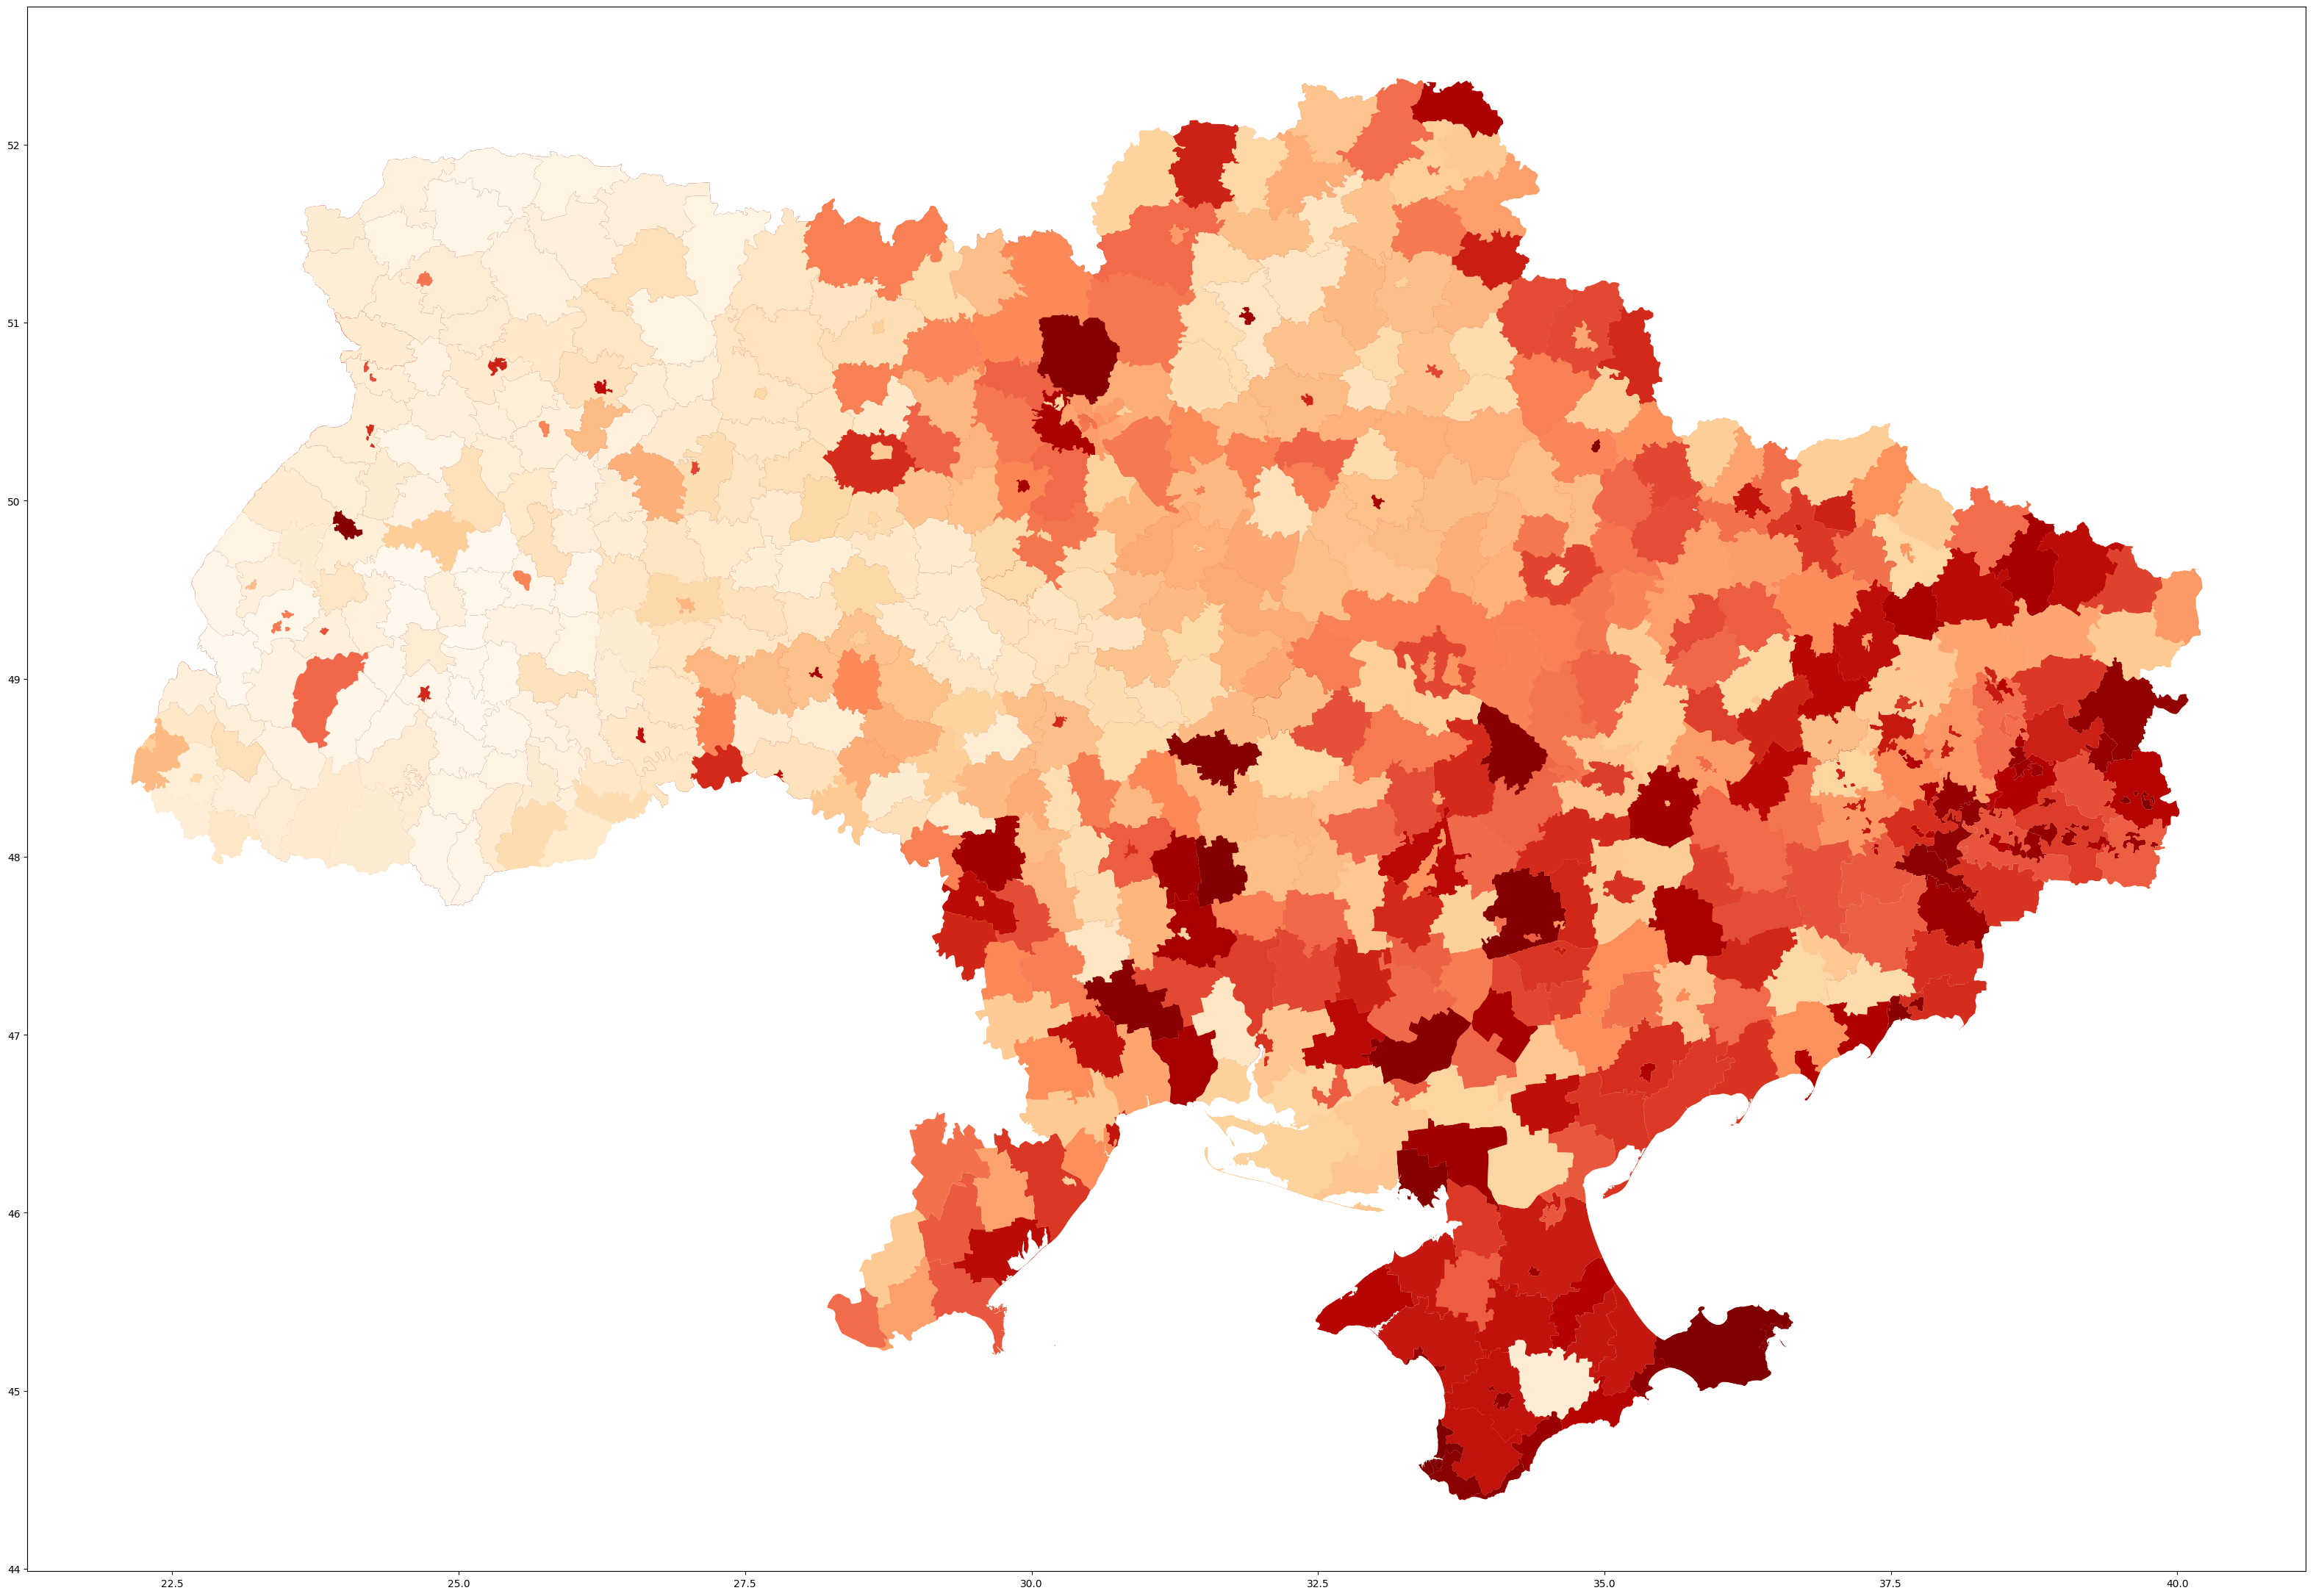

In [104]:
#plot language data not nan values
fig, ax = plt.subplots(figsize=(40, 40))
gdf_ukraine_adm_2_old.plot(ax=ax, column='Ukrainian', cmap='OrRd', missing_kwds={'color': 'lightgrey'})
gdf_ukraine_adm_2_old.plot(ax=ax, column='Russian', cmap='OrRd', missing_kwds={'color': 'lightgrey'})


/home/bernardo/Documents/Insper8thSem/georeferenced-information-class/project/Proj-GEO/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_5406/3751548769.py:5: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  test.plot()


<Axes: >

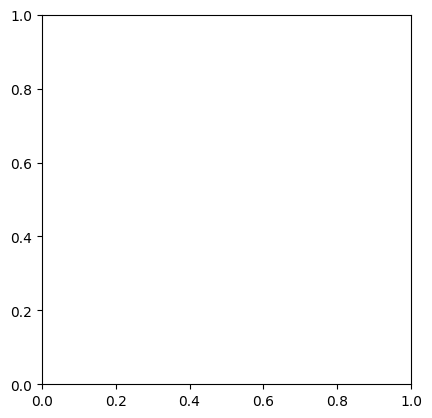

In [126]:
#sjoin gdf_ukraine_adm_2 and gdf_ukraine_adm_2_old
gdf_ukraine_adm_2 = gdf_ukraine_adm_2.to_crs(epsg=6381)
gdf_ukraine_adm_2_old = gdf_ukraine_adm_2_old.to_crs(epsg=6381)
test = gpd.sjoin(gdf_ukraine_adm_2, gdf_ukraine_adm_2_old, how='inner', op='within')
test.plot()

<Axes: >

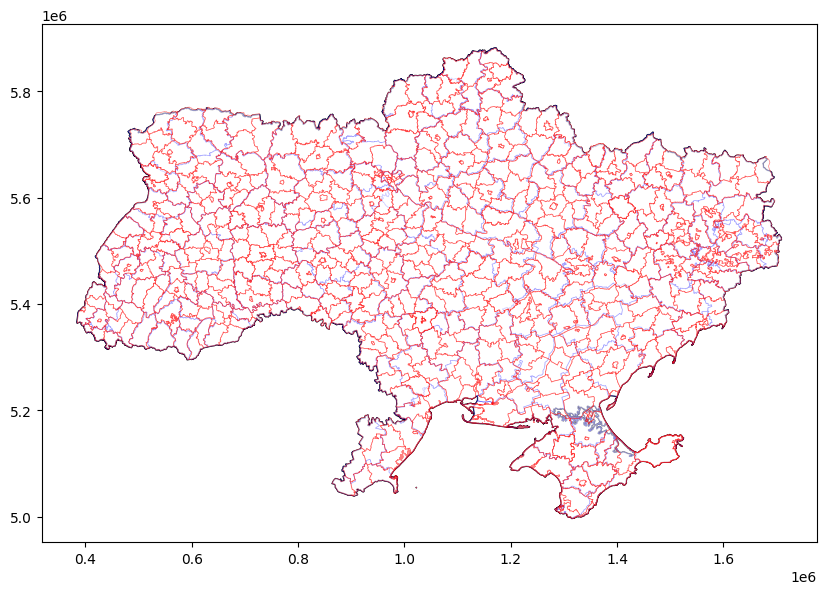

In [127]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ukraine_adm_0.plot(ax=ax, color='white', edgecolor='black')
gdf_ukraine_adm_2.plot(ax=ax, color='white', edgecolor='blue', linewidth=0.5, alpha=0.5)
gdf_ukraine_adm_2_old.plot(ax=ax, color='white', edgecolor='red', linewidth=0.5, alpha=0.5)

<Axes: >

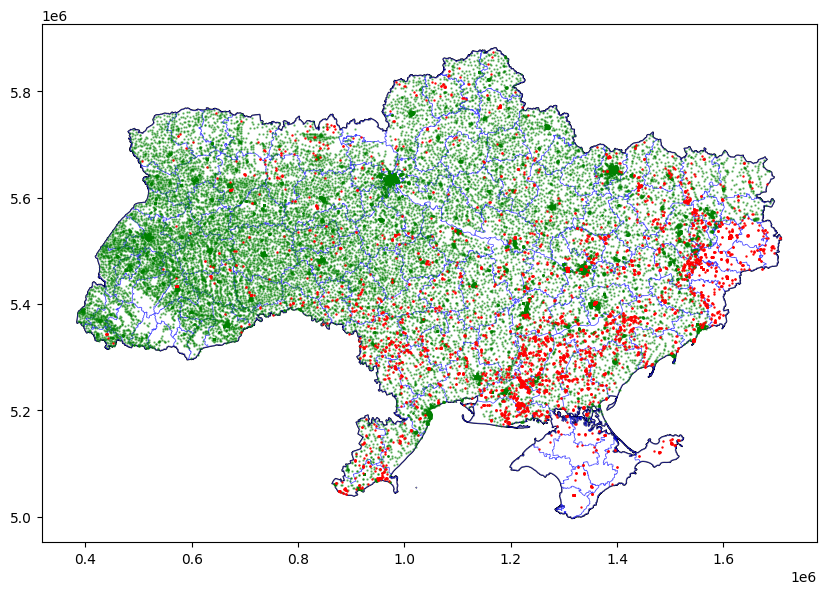

In [120]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ukraine_adm_0.plot(ax=ax, color='white', edgecolor='black')
gdf_ukraine_adm_2.plot(ax=ax, color='white', edgecolor='blue', linewidth=0.5, alpha=0.5)
gdf_results_uk_pull_stations.plot(ax=ax, color='green', markersize=0.5, alpha=0.5)
gdf_firms_out_2023.plot(ax=ax, color='red', markersize=0.5)

In [149]:
#get shapefiles from OldSHP
gdf_ukraine_adm_2_old = gpd.read_file('../data/OldSHP/UKR_adm2.shp')
gdf_ukraine_adm_2_old.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,240,UKR,Ukraine,1,Cherkasy,1,Cherkas'ka,Mis'ka Rada,Mis'ka Rada,None,None,"POLYGON ((32.17150 49.43881, 32.16858 49.41685..."
1,240,UKR,Ukraine,1,Cherkasy,2,Cherkas'kyi,Raion,District,None,None,"POLYGON ((32.19797 49.20946, 32.18890 49.20953..."
2,240,UKR,Ukraine,1,Cherkasy,3,Chornobaivs'kyi,Raion,District,None,Chornobayivskyi,"POLYGON ((32.17150 49.43881, 32.17080 49.43904..."
3,240,UKR,Ukraine,1,Cherkasy,4,Chyhyryns'kyi,Raion,District,None,None,"POLYGON ((32.87844 49.22034, 32.87827 49.20856..."
4,240,UKR,Ukraine,1,Cherkasy,5,Drabivs'kyi,Raion,District,None,None,"POLYGON ((32.45570 49.93700, 32.45568 49.93112..."


In [146]:
gdf_ukraine_adm_2 = gdf_ukraine_adm_2.to_crs(epsg=6381)
gdf_ukraine_adm_2_old = gdf_ukraine_adm_2_old.to_crs(epsg=6381)
gdf_ukraine_adm_0 = gdf_ukraine_adm_0.to_crs(epsg=6381)

<Axes: >

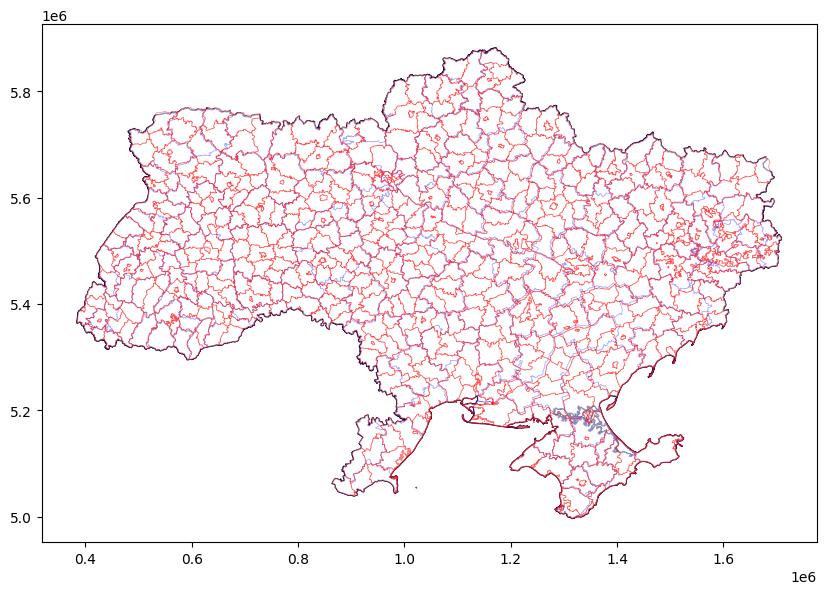

In [147]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ukraine_adm_0.plot(ax=ax, color='white', edgecolor='black')
gdf_ukraine_adm_2.plot(ax=ax, color='white', edgecolor='blue', linewidth=0.5, alpha=0.5)
gdf_ukraine_adm_2_old.plot(ax=ax, color='white', edgecolor='red', linewidth=0.5, alpha=0.5)